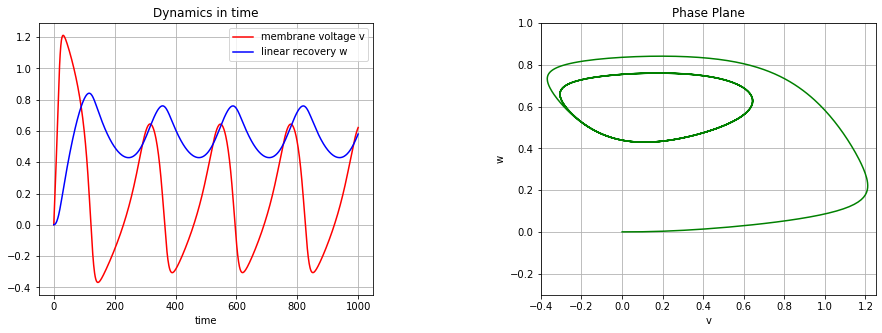

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
from scipy import integrate
import sys

# show plots in notebook
%matplotlib inline

# define system in terms of separated differential equations
I = .5;
a = .1;
eps = .1;
gamma = .25;

def f(v,w):
    return I + v*(1-v)*(v-a)-w
def g(v,w):
    return eps*(v-gamma*w)

# initialize lists containing values
v = []
w = []

#iv1, iv2 = initial values, dt = timestep, time = range

# define a template for our function or system called “sys”
def sys(iv1, iv2, dt, time):
    # initial values:
    v.append(iv1)
    w.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        v.append(v[i] + (f(v[i],w[i])) * dt)
        w.append(w[i] + (g(v[i],w[i])) * dt)
        #z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return v, w

# Call sys function with initial values
sys(0.001, 0.001, .1, 1000)



#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(v, 'r-', label='membrane voltage v')
ax1.plot(w, 'b-', label='linear recovery w')
#ax1.plot(z, 'g-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.set_ylim([-.3,1])
ax2.set_xlim([-.4,1.25])
ax2.plot(v, w, color="green")
ax2.set_xlabel("v")
ax2.set_ylabel("w")  
ax2.set_title("Phase Plane")
ax2.grid()



In [44]:
fp = []
def find_fixed_points(r):
    for v in range(r):
        for w in range(r):
            if ((f(v,w) == 0) and (g(v,w) == 0)):
                fp.append((v,w))
                print('The system has a fixed point in %s,%s' % (v,w))
    return fp

find_fixed_points(100)



[]

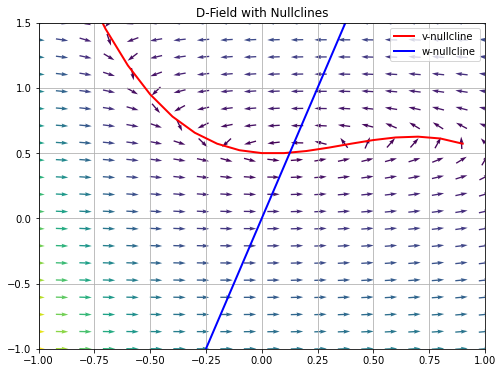

In [45]:
# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = v and x[1] = w    
    return np.array([I+X[0]*(1-X[0])*(X[0]-a)-X[1], eps*(X[0]-gamma*X[1])])

#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

#x = np.linspace(-1,1,20)
x = np.arange(-1,1,.1)

o = I + x*(1-x)*(x-a)
p = x/gamma

# plot nullclines
ax4.plot(x,o,'r-', lw=2, label='v-nullcline')
ax4.plot(x,p, 'b-', lw=2, label='w-nullcline')

# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("D-Field with Nullclines")
ax4.legend(loc='best')

# D-Field
# define a grid and compute direction at each point
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1.5, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows.
DY1 /= M

ax4.set_ylim([-1,1.5])
ax4.set_xlim([-1,1])
ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()
